In [28]:
from parsers import Parser
import seaborn as sns
import os
import pandas as pd
from collections import Counter
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

rc = {'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', font='SimHei', rc=rc)

In [2]:
# Step1: Parse PubMed Files
files = os.listdir('./pubmed_data')
file_paths = ['./pubmed_data/' + i for i in files]
f = Parser(file_paths)
print(f'文献总数：{len(f.record_items)}')

文献总数：22972


中国研究机构参与文献总数：15658


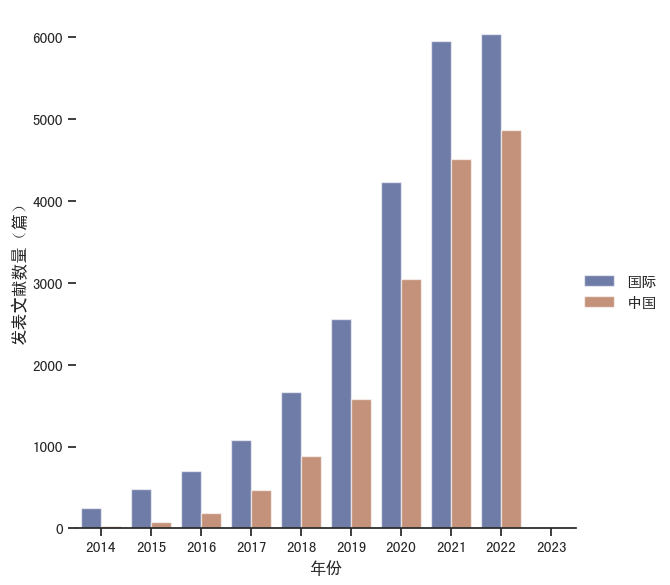

In [3]:
# Step2: Compared International Contributions and Chinese Contributions by Year
international_contrib_year_cluster = f.cluster_by_year(f.record_items)
chinese_contrib = f.filter_chinese(f.record_items, first_author=True)
print(f"中国研究机构参与文献总数：{len(chinese_contrib)}")
chinese_contrib_year_cluster = f.cluster_by_year(chinese_contrib)
years_num = list(international_contrib_year_cluster.keys())
years_num_sorted = sorted(years_num)
international_contrib_count = []
chinese_contrib_count = []
for year in years_num_sorted:
    international_contrib_count.append(len(international_contrib_year_cluster[year]))
    chinese_contrib_count.append(len(chinese_contrib_year_cluster[year]))
contrib_df = pd.DataFrame(
    data={'Year': years_num_sorted + years_num_sorted,
          'Scope': ['国际' for i in range(len(years_num))] + ['中国' for i in range(len(years_num))],
          'Count': international_contrib_count + chinese_contrib_count})

g = sns.catplot(
    data=contrib_df, kind="bar",
    x="Year", y="Count", hue="Scope",
    errorbar="sd", palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("年份", "发表文献数量（篇）")
g.legend.set_title("")

In [4]:
# Step3: Order the times of Chinese Institutions
institution = []
for item in chinese_contrib:
    ad = item['AD'][0]
    try:
        candidate = [ad.split(',')[-4].strip(), ad.split(',')[-3].strip(), ad.split(',')[-2].strip()]
        for i in candidate:
            if ' ' not in i:
                institution.append(i)
                break
    except IndexError:
        continue
sort_dict = sorted(Counter(institution).items(), key=lambda x: x[1], reverse=True)
for key, value in sort_dict:
    if value >= 100:
        print(f"{key}: {value}")

Shanghai: 1200
Guangzhou: 938
Beijing: 767
Wuhan: 659
Nanjing: 571
Changsha: 486
Shenyang: 457
Hangzhou: 383
Jinan: 344
Zhengzhou: 326
Xi'an: 325
Nanning: 306
Harbin: 303
Tianjin: 292
Chongqing: 285
Chengdu: 246
Wenzhou: 199
Nanchang: 187
Suzhou: 185
Fuzhou: 181
Changchun: 173
Shenzhen: 159
Hefei: 155
Qingdao: 144
Nantong: 127
Shijiazhuang: 106
Ningbo: 102


In [5]:
# Step4: Order all the Journals
journals_data = f.cluster_by_journal(f.record_items)
count_dict = {}
for journal in journals_data.keys():
    count_dict[journal] = len(journals_data[journal])
ordered_count_dict = sorted(count_dict.items(), key=lambda x: x[1])
print(ordered_count_dict)

[('Current protein & peptide science', 1), ('Journal of cancer prevention', 1), ('Topics in magnetic resonance imaging : TMRI', 1), ('Proteomes', 1), ('Annual review of genetics', 1), ('SpringerPlus', 1), ('Zhonghua wei chang wai ke za zhi = Chinese journal of gastrointestinal surgery', 1), ('Hepatoma research', 1), ('Neurology', 1), ('... IEEE-EMBS International Conference on Biomedical and Health Informatics. IEEE-EMBS International Conference on Biomedical and Health Informatics', 1), ('Journal of cutaneous pathology', 1), ('Cancer cytopathology', 1), ('Biotechnology progress', 1), ('Physiological reports', 1), ('Journal of neuroradiology = Journal de neuroradiologie', 1), ('Surgery', 1), ('Nature reviews. Clinical oncology', 1), ('Expert review of neurotherapeutics', 1), ('International journal of molecular epidemiology and genetics', 1), ('Respiratory medicine', 1), ('BMC clinical pathology', 1), ('Human vaccines & immunotherapeutics', 1), ('Epilepsy research', 1), ('Genomics & in

In [6]:
# Step5: Order Chinese choosing Journals
chinese_choosing_journals_data = f.cluster_by_journal(chinese_contrib)
count_dict = {}
for journal in chinese_choosing_journals_data.keys():
    count_dict[journal] = len(chinese_choosing_journals_data[journal])
ordered_count_dict = sorted(count_dict.items(), key=lambda x: x[1])
print(ordered_count_dict)

[('Genes & cancer', 1), ('Annual review of genetics', 1), ('Cancer health disparities', 1), ('Zhonghua wei chang wai ke za zhi = Chinese journal of gastrointestinal surgery', 1), ('Neurology', 1), ('Studies in health technology and informatics', 1), ('Journal of cranio-maxillo-facial surgery : official publication of the European Association for Cranio-Maxillo-Facial Surgery', 1), ('Hormone and metabolic research = Hormon- und Stoffwechselforschung = Hormones et metabolisme', 1), ('Journal of thoracic oncology : official publication of the International Association for the Study of Lung Cancer', 1), ('Expert review of neurotherapeutics', 1), ('Epilepsy research', 1), ('Oncology', 1), ('Journal of molecular medicine (Berlin, Germany)', 1), ('Physica medica : PM : an international journal devoted to the applications of physics to medicine and biology : official journal of the Italian Association of Biomedical Physics (AIFB)', 1), ('Chemical science', 1), ('Journal of neurosurgery', 1), (

                                               TCGA_Cases_Count  Papers_Count
brain                                                      1113           861
breast                                                     1098          1482
bronchus and lung                                          1027          1407
kidney                                                      943           703
ovary                                                       588           490
corpus uteri                                                552            21
thyroid gland                                               509           253
prostate gland                                              500           436
skin                                                        470           197
colon                                                       461           346
stomach                                                     449           720
liver and intrahepatic bile ducts                           418 

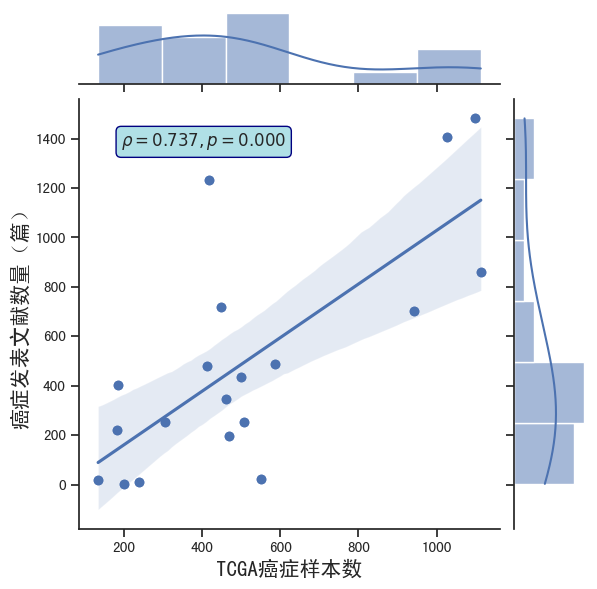

In [10]:
# Step6: MeSH statistics in Cancer, and compute the correlation with TCGA Database's Sample count
tcga_cases_count = {
    'brain': 1113,
    'breast': 1098,
    'bronchus and lung': 1027,
    'kidney': 943,
    'ovary': 588,
    'corpus uteri': 552,
    'thyroid gland': 509,
    'prostate gland': 500,
    'skin': 470,
    'colon': 461,
    'stomach': 449,
    'liver and intrahepatic bile ducts': 418,
    'bladder': 412,
    'cervix uteri': 307,
    'adrenal gland': 240,
    'hematopoietic and reticuloendothelial systems': 200,
    'pancreas': 185,
    'esophagus': 183,
    'testis': 135
}
tcga_mesh = {
    'brain': ['Brain Neoplasms'],
    'breast': ['Breast Neoplasms'],
    'bronchus and lung': ['Carcinoma, Bronchogenic', 'Lung Neoplasms'],
    'kidney': ['Kidney Neoplasms'],
    'ovary': ['Ovarian Neoplasms'],
    'corpus uteri': ['Uterine Neoplasms'],
    'thyroid gland': ['Thyroid Neoplasms'],
    'prostate gland': ['Prostatic Neoplasms'],
    'skin': ['Skin Neoplasms'],
    'colon': ['Colonic Neoplasms'],
    'stomach': ['Stomach Neoplasms'],
    'liver and intrahepatic bile ducts': ['Liver Neoplasms', 'Bile Ducts, Intrahepatic'],
    'bladder': ['Urinary Bladder Neoplasms'],
    'cervix uteri': ['Uterine Cervical Neoplasms'],
    'adrenal gland': ['Adrenal Gland Neoplasms'],
    'hematopoietic and reticuloendothelial systems': ['Hematologic Neoplasms'],
    'pancreas': ['Pancreatic Neoplasms'],
    'esophagus': ['Esophageal Neoplasms'],
    'testis': ['Testicular Neoplasms']
}
paper_count = {}
for key, value in tcga_mesh.items():
    paper_count[key] = len(f.filter_mesh(f.record_items, value))
paper_cases_df = pd.DataFrame(index=list(tcga_cases_count.keys()), data={
    'TCGA_Cases_Count': list(tcga_cases_count.values()),
    'Papers_Count': list(paper_count.values())
})
print(paper_cases_df)
g = sns.jointplot(x='TCGA_Cases_Count', y='Papers_Count', data=paper_cases_df, kind='reg')
r, p = pearsonr(list(tcga_cases_count.values()), list(paper_count.values()))
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
g.ax_joint.scatter(list(tcga_cases_count.values()), list(paper_count.values()))
g.set_axis_labels(xlabel='a', ylabel='b', size=15)
g.set_axis_labels("TCGA癌症样本数", "癌症发表文献数量（篇）")
plt.show()

In [31]:
# Step7: Statistic the show frequency in every record and compute the co-occurrence matrix
def create_co_matrix(cancer_name):
    target_records = f.filter_mesh(f.record_items, tcga_mesh[cancer_name])
    all_mesh_item = []

    for record in target_records:
        for mesh_prefix in record['MH_PREFIX']:
            all_mesh_item.append(mesh_prefix)

    frequency = Counter(all_mesh_item)

    filtered_frequency = {}
    for key, value in frequency.items():
        if value >= 10:
            filtered_frequency[key] = value

    init_data = np.zeros((len(filtered_frequency), len(filtered_frequency)), dtype=np.int32)
    cooccurence_df = pd.DataFrame(data=init_data, index=list(filtered_frequency.keys()),
                                  columns=list(filtered_frequency.keys()))
    for record in target_records:
        for pair_former in record['MH_PREFIX']:
            for pair_latter in record['MH_PREFIX']:
                try:
                    cooccurence_df[pair_former][pair_latter] += 1
                except KeyError:
                    continue
    cooccurence_df.to_excel(f'./co-occurence/{len(filtered_frequency)} {cancer_name}.xlsx', header=True)


for cancer in tcga_mesh.keys():
    create_co_matrix(cancer)